# Hands-on lattice calculations for the AUTH 2024 Accelerator Phyiscs course
*T. Prebibaj, F. Asvesta, Y. Papaphilippou*

---

# Part I: Tracking basics

We will refer to the lectures of Yannis and Foteini as lecture XX slide XX. 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Representing particles (lecture II slide 5)

<p align="center">
<img src=./images_lectures/frenet_system.png width="25%">
</p>

- The motion of particles in accelerators is described with the Frenet system of reference.

- More formally, charged particles are best described by **Hamiltonian dynamics** using **canonical coordinates**. Typical canonical coordinates are the horizontal (or vertical) position $x$, and the corresponding horizontal momentum $P_x$ divided by the reference momentum $P_0$, i.e. $p_x=P_x/P_0$.

- The particle coordinates in the three degrees of freedom are usually: **$(x,p_x)$, $(y,p_y)$, $(z, \delta)$**.

- In this course, we will concentrate mainly on the **transverse dynamics**, i.e. horizontal $(x,p_x)$ or vertical $(y,p_y)$ plane. 

- If we assume that particle trajectories have **small offsets and angles** (say less than a few mm and mrad) with respect to the "axis" of long (say a few m-long) beamline under study, then:
    
    \begin{equation}
       p_x = \frac{P_x}{P_0} \approx \frac{P_x}{P_s} = \tan(x') \approx x'
    \end{equation}
    
    where $P_s$ is the projected momentum along the beamline direction (i.e. coordinate $s$), and $x'$ is the angle of the particle with respect to the $s$. Therefore, we assume here that using $(x, x')$ as **position-angle phase-space coordinates** is a **valid approximation**.

- The motion of **charged particles** with respect to the "center" of a beamline resamples the motion of **optical rays** in optical systems.

### Exercise 1 (guided): representing a single particle in Python

A single particle is described by a column vector containing its phase-space coordinates ($x$, $x'$):
\begin{equation}
\vec{x} = X = \left(
\begin{array}{c}
x \\
x'
\end{array}
\right).
\end{equation}

Describe a single particle in the horizontal plane that lies on the optical axis with an angle $x' = 0.5$ mrad. 

In [2]:
x = 0 # initial position (usually in mm)
xp = 0.5 # initial angle (usually in mrad)
X_0 = np.array([[x], 
                [xp]])
print(f'Initial particle coordinates:\n {X_0}')

Initial particle coordinates:
 [[0. ]
 [0.5]]


### Exercise 2 (guided): representing multiple particles (a beam) in Python

The phase-space coordinates of several, say $N$, particles can be conveniently collected in a $2 \times N$ matrix:
\begin{equation}
X = \left[ 
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_1
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_2
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_3
    \cdots
    \left(
    \begin{array}{c}
    x \\
    x'
    \end{array}
    \right)_N
\right]
\end{equation}

Using this formalism, describe $N=5$ particles all with initial angle $x'_0=0$, but different initial $x_0$, e.g. [-2,-1,0,1,2] mm.

In [3]:
# Let's define all initial conditions "by-hand":
X_0 = np.array([[-2,-1,0,1,2], 
                [0,0,0,0,0]])
print(f'Initial particle coordinates:\n {X_0}')

Initial particle coordinates:
 [[-2 -1  0  1  2]
 [ 0  0  0  0  0]]


Then, describe $N=5000$ particles with random $(x_0,x'_0)$ coordinates drawn from a normal Gaussian distribution centered at $0$ and with a standard deviation of $1$ mm. Plot them in phase space.

In [4]:
# We can use the random number generators provided by numpy
N = 5000 # number of particles
X_0 = np.array([np.random.normal(0,1,N),
                np.random.normal(0,1,N)])
print('Number of particles', len(X_0[0]))

Number of particles 5000


Text(0, 0.5, "x' [mm]")

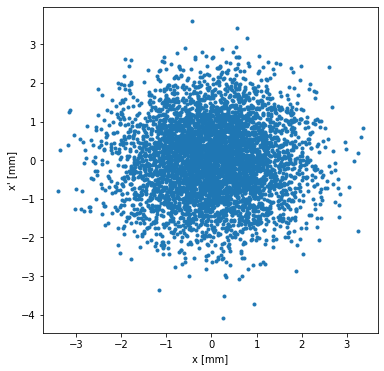

In [5]:
# We can plot them as dots in the phase space
plt.figure(figsize=(6,6))
plt.plot(X_0[0,:], X_0[1,:], '.')
plt.xlabel('x [mm]')
plt.ylabel("x' [mm]")

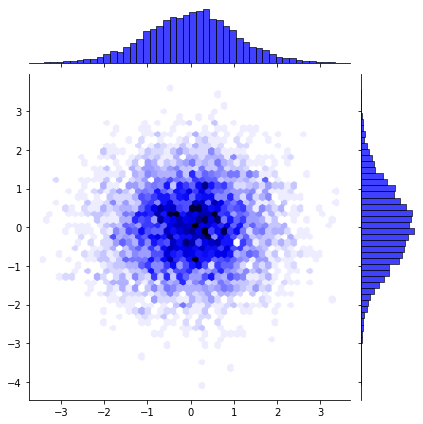

In [6]:
# you can plot it in a more fancy way
sns.jointplot(x=X_0[0,:], y=X_0[1,:], kind="hex", color="b")

The mean of the x-coordinates is the average beam position (or beam centroid) while the standard deviation ($1\sigma$) of the x-coordinates is referred as the beam size. 

Repeat the same exercise for a uniform distribution between $0$ and $1$. 

Text(0, 0.5, "x' [mm]")

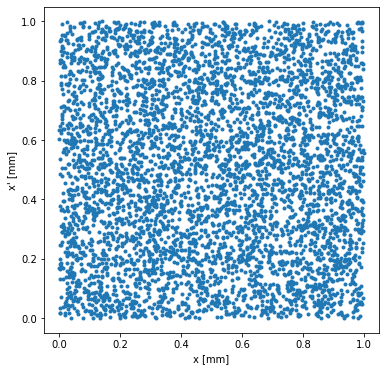

In [7]:
N = 5000 # number of particles
X_0 = np.array([np.random.uniform(0,1,N),
                np.random.uniform(0,1,N)])
plt.figure(figsize=(6,6))
plt.plot(X_0[0,:], X_0[1,:], '.')
plt.xlabel('x [mm]')
plt.ylabel("x' [mm]")

> Note: this is not a very realistic distribution of particles in a beam.

## 2) Accelerator elements (lecture II slide 14)

- An accelerator consists of a number of electromagnetic elements (dipoles, quadrupoles, sextupoles, etc.).

- In linear approximation, an element is represented with a matrix M and the particle transport from $s=s_0$ to $s=s_1$ as:

    \begin{equation}
    \left(
    \begin{array}{c}
    x_1 \\
    x'_1
    \end{array}
    \right) = M \cdot
    \left(
    \begin{array}{c}
    x_0 \\
    x'_0
    \end{array}
    \right),
    \end{equation}

    or 

    \begin{equation}
    X_1 = M \cdot X_0,
    \end{equation}


    where $X_0$ are the initial coordinates of the particle at $s_0$, and $X_1$ the final ones at $s_1$ (just after the element).

- The absence of an element, i.e. a drift space, is also represented as an element. A `drift` is represented by a matrix with ones on the diagonal and the length of the drift on the upper right corner (lecture II slide 17):

    \begin{equation}
    D=\left[
    \begin{array}{c}
    1\quad L\\
    0\quad 1
    \end{array}
    \right],
    \end{equation}


### Exercise 3 (guided): transfering particles in a drift space

Transport $N=5$ particles with initial angles $x'_0=0$, but different initial $x_0$, e.g. $[-2,-1,0,1,2]$ mm, through a drift space of 2 m.

Then, transport through the same drift space $N=5$ particles with initial positions $x_0=0$, but different initial $x'_0$, e.g. $[-0.2,-0.1,0,0.1,0.2]$ mrad.|

In both cases, plot the particle x coordinates as a function of the s-position (i.e. $s_0=0$ and $s_1=L=2$).

In [8]:
# We define the drift as a numpy matrix:
L = 2*1000 # be careful of the units! we represent x with mm. 
D = np.array([[1, L], [0, 1]])
print(D)

[[   1 2000]
 [   0    1]]


Initial particle coordinates:
 [[-2 -1  0  1  2]
 [ 0  0  0  0  0]]
Final particle coordinates:
 [[-2 -1  0  1  2]
 [ 0  0  0  0  0]]


Text(0, 0.5, 'x [mm]')

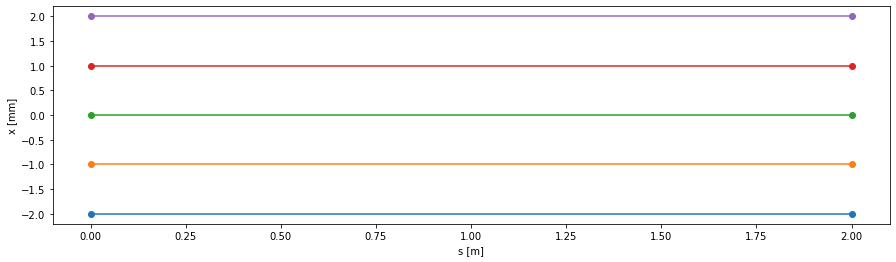

In [9]:
# The initial coordinates
X_0 = np.array([[-2,-1,0,1,2], 
                [0,0,0,0,0]])
print(f'Initial particle coordinates:\n {X_0}')

# The final coordinates (NOTE: matrix multiplication is done with @ while * represents element by element multiplication):
X_1 = D @ X_0
print(f'Final particle coordinates:\n {X_1}')

# We will plot for each particle the initial and final x-coordinate between 
s = [0,L*1e-3] # usually s is in meters
plt.figure(figsize=(15,4))
for i in range(len(X_0[0])):
    plt.plot(s, [X_0[0,i], X_1[0,i]], 'o-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

Initial particle coordinates:
 [[ 0.   0.   0.   0.   0. ]
 [-0.2 -0.1  0.   0.1  0.2]]
Final particle coordinates:
 [[-4.e+02 -2.e+02  0.e+00  2.e+02  4.e+02]
 [-2.e-01 -1.e-01  0.e+00  1.e-01  2.e-01]]


Text(0, 0.5, 'x [mm]')

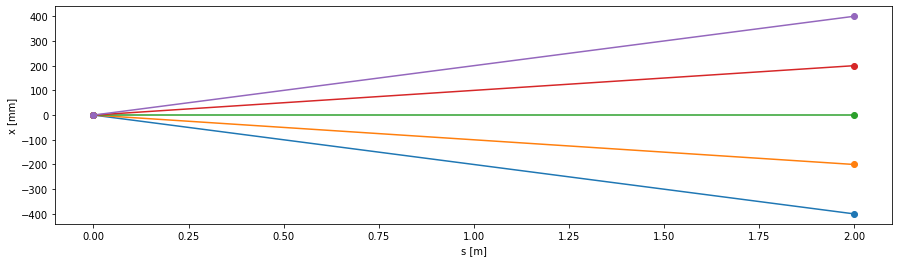

In [10]:
# The initial coordinates
X_0 = np.array([[0,0,0,0,0], 
                [-0.2,-0.1,0,0.1,0.2]])
print(f'Initial particle coordinates:\n {X_0}')

# The final coordinates (NOTE: matrix multiplication is done with @ while * represents element by element multiplication):
X_1 = D @ X_0
print(f'Final particle coordinates:\n {X_1}')

# We will plot for each particle the initial and final x-coordinate between 
plt.figure(figsize=(15,4))
s = [0,L*1e-3] # usually s is in meters
for i in range(len(X_0[0])):
    plt.plot(s, [X_0[0,i], X_1[0,i]], 'o-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

Particles with $p_x\neq0$ can get lost in the horizontal aperture of our accelerator (for example the beam pipe). We need to focus our beam!

- Quadrupoles are used to focus the beam. Unfortunately, quadrupoles **focus in one plane** and **defocus in the other plane** (lecture I slide 44). Thus, to have a focuing in both horizontal and vertical plane, we need to alternate focusing and defocusing quadrupoles. 

- The transfer matrix of a `thin quadrupole` (thin lens approximation) with a focal length $\pm f$ is given by (lecture II slide 18):

    \begin{equation}
    Q=\left[
    \begin{array}{c}
    1\quad 0\\
    \mp f\quad 1
    \end{array}
    \right].
    \end{equation}

    We will represent the focusing quadrupole as $QF\equiv Q(+f)$ and the defocusing quadrupole as $QD\equiv Q(-f)$.

### Exercise 4: transfering particles in a drift space and a quadrupole

Implement a focusing quadrupole matrix (using the thin lens approximation) with focal length $f = 0.3$ m and two drift spaces of $L_1=0.5$ m and $L_2=1$ m.

Transport $N=5$ particles, with initial positions $x_0=0$ but different initial $x'_0$, e.g. $[-0.2,-0.1,0,0.1,0.2]$ mrad, in the first drift, then in the quadrupole and finally in the second drift.

Plot the particle x coordinates as a function of the s-position.

In [11]:
# Definition of elements

# The first drift space with length 0.5 meters
L1 = 0.5*1000 # to mm 
D1 = np.array([[1, L1], [0, 1]])

# The focusing quadrupole
f = +0.3*1000 # units to mm
QF = np.array([[1, 0], [-1/f, 1]])

# The second drift space with length 1 meter
L2 = 1*1000
D2 = np.array([[1, L2], [0, 1]])

In [12]:
# The definition of particles (initial coordinates)
X_0 = np.array([[0,0,0,0,0], 
                [-0.2,-0.1,0,0.1,0.2]])
print(f'Initial particle coordinates:\n {X_0}')

Initial particle coordinates:
 [[ 0.   0.   0.   0.   0. ]
 [-0.2 -0.1  0.   0.1  0.2]]


In [13]:
# coordinates after D1
X_1 = D1 @ X_0
# coordinates after QF
X_2 = QF @ X_1
# coordinates after D2
X_3 = D2 @ X_2

Text(0, 0.5, 'x [mm]')

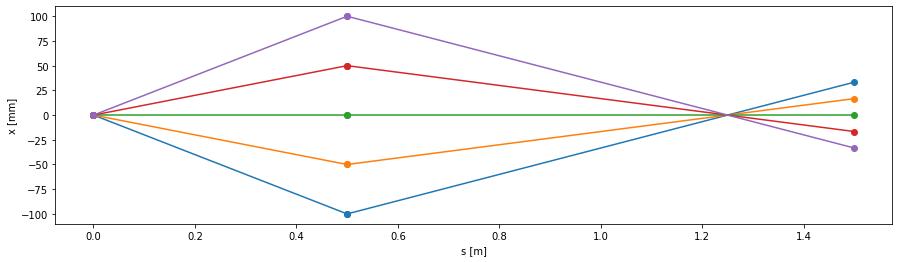

In [14]:
# We will plot for each particle the x-coordinates between 
plt.figure(figsize=(15,4))
s = [0, L1*1e-3, L1*1e-3, (L1+L2)*1e-3] # be careful of the units
for i in range(len(X_0[0])):
    plt.plot(s, [X_0[0,i],X_1[0,i],X_2[0,i],X_3[0,i]], 'o-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

> Note: the final state can be obtained by the initial state if we multiply all the matrices:
> \begin{equation}
> X_3 = D_2 \cdot QF \cdot D_1 \cdot X_0,
> \end{equation}
> **Note the order of the matrices!**

## 3) Simple beam line (lecture II slide 25)

- A beam line (or a whole ring) is modelled by a series of matrices: 

    \begin{equation}
    X_s = M_n \cdot ... \cdot M_2 \cdot M_1 \cdot X_0
    \end{equation}

- Independently of the initial particle coordinates, we can compute a single matrix ($M_{eq.}$) that represents the whole beam line (or ring): 

    \begin{equation}
    X_s = M_n \cdot ... \cdot M_2 \cdot M_1 \cdot X_0 = M_{eq.} \cdot X_0
    \end{equation}

### Exercise 5 (guided): transfer a particle in a beamline

Assuming $L=1$ m and $f=0.25$ m, transfer a particle with initial coordinates $x_0=1$ mm and $x'_0=0$ over a beam line consisting of:

- A thin focusing quadrupole of a focusing length $2f$
- A drift of length L
- A defocusing quadrupoles of focusing length $f$
- A drift of length L
- A thin focusing quadrupole of a focusing length $2f$

Get the equivalent element of the beam line (i.e. $M_{eq.}$)

In [15]:
# Definition of elements
f = 0.25*1000
L = 1*1000
HQF1 = np.array([[1, 0], [-1/(2*f), 1]]) # half-focusing quad
D1 = np.array([[1, L], [0, 1]])
QD = np.array([[1, 0], [1/f, 1]])
D2 = np.array([[1, L], [0, 1]])
HQF2 = np.array([[1, 0], [-1/(2*f), 1]])

# inital coordinates of particle
X_0 = np.array([[1], 
                [0]])

# Coordinates after each element
X_1 = HQF1 @ X_0
X_2 = D1 @ X_1
X_3 = QD @ X_2
X_4 = D2 @ X_3
X_5 = HQF2 @ X_4

Text(0, 0.5, 'x [mm]')

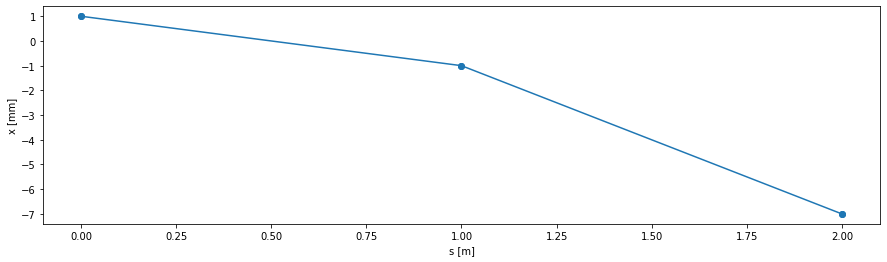

In [16]:
# Plot particle coordinates at each element
plt.figure(figsize=(15,4))
s = [0, 0, L*1e-3, L*1e-3, (L+L)*1e-3, (L+L)*1e-3] # we convert it to meters
plt.plot(s, [X_0[0],X_1[0],X_2[0],X_3[0],X_4[0],X_5[0]], 'o-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

In [17]:
# the equivalent matrix
Meq = HQF2 @ D2 @ QD @ D1 @ HQF1
print(Meq)

[[-7.e+00  6.e+03]
 [ 8.e-03 -7.e+00]]


---

# Interlude: a small tracking library

We are going to define some python functions to facilitate the definition of matrices, of beamlines, of the particle transport (tracking) that will be useful for the rest of the exercises. 

---


### Modeling of a quadrupole

In [18]:
def D(L):
    '''Returns a list containing a single "drift" of length L'''
    # NB: we return a list with a dict
    # the dict contains the matrix (the transformation)
    # and the element length 
    return [{'matrix':np.array([[1, L],[0, 1]]), 'length':L}] 

In [19]:
# Example: a drift of L=2 m can be generated as:
D(2)

[{'matrix': array([[1, 2],
         [0, 1]]),
  'length': 2}]

The main reason for returning such a `list` with inside a `dictionary` are:

- it will allow us to keep track of the path travelled by the particle (thanks to the `length` dictionary key)
- the element is embedded in a list so to allow for an easy concatenation of elements (e.g. D(1.2) + D(4.3) will produce a list with two elements: one representing a drift of L=1.2 and one of L=4.3 m).

In [20]:
# e.g. representation of a beamline made of two drifts of different length:
D(1) + D(2)

[{'matrix': array([[1, 1],
         [0, 1]]),
  'length': 1},
 {'matrix': array([[1, 2],
         [0, 1]]),
  'length': 2}]

> **Note:** this is just **one of many possible implementation** choices.
> One could think of different structures and ways to model a beamline.
> The scope of this course is not to give you a high-efficency and optimised tracking code, 
> but to **help you to understand** the basics of the underlying **accelerator physics**.

### Modeling of a quadrupole

In [21]:
def Q(f):
    '''Returns a list containing a quadrupole with focal length f'''
    # NB: we return a list with a dict
    # the dict contains the matrix (the transformation)
    # and the element length 
    return [{'matrix':np.array([[1, 0],[-1/f, 1]]), 'length':0}]

In [22]:
# Example: representation of a beamline made of one drift followed by one quadrupole:
D(1) + Q(2)

[{'matrix': array([[1, 1],
         [0, 1]]),
  'length': 1},
 {'matrix': array([[ 1. ,  0. ],
         [-0.5,  1. ]]),
  'length': 0}]

### Modeling a beamline

In [23]:
# Now the definition of the beamline of exercise 5 is much easier:
f = 0.25*1000
L = 1*1000
beamline = Q(2*f)+D(L)+Q(-f)+D(L)+Q(2*f)
beamline

[{'matrix': array([[ 1.   ,  0.   ],
         [-0.002,  1.   ]]),
  'length': 0},
 {'matrix': array([[   1, 1000],
         [   0,    1]]),
  'length': 1000},
 {'matrix': array([[1.   , 0.   ],
         [0.004, 1.   ]]),
  'length': 0},
 {'matrix': array([[   1, 1000],
         [   0,    1]]),
  'length': 1000},
 {'matrix': array([[ 1.   ,  0.   ],
         [-0.002,  1.   ]]),
  'length': 0}]

### Getting the equivalent element from a beamline

Given our choice of beamline strcuture, i.e. a `list` of **elements**, each modeled by a `dictionary` with some properties, we can define a useful function to compute the *equivalent* matrix $M_{eq.}$ (actually an *equivalent* **element** represented by a `dictionary` inside a `list`) of a whole beamline made of several **elements**:

In [24]:
def getEquivalentElement(beamline):
    '''Returns the single element which is equivalent of the given beamline'''
    # we start from an identity matrix (np.eye)
    # with the same dimension of the matrix of the
    # first element of the beamline
    equivalentElement = np.eye(beamline[0]['matrix'].shape[0])
    length = 0
    # NB: we reverse the order of the beamline ([-1::-1])
    for elements in beamline[-1::-1]:
        # we multiply the matrices 
        equivalentElement = equivalentElement @ elements['matrix']
        # and we add the lengths
        length = length + elements['length']
    # we return the dict with the "usual" keys (matrix and length) embedded in a
    #  list (with a single element), as for the definition of the D and Q functions
    return [{'matrix':equivalentElement, 'length':length}]

In [25]:
# Example: equivalent element of the FODO of exercise 5
f = 0.25*1000
L = 1*1000
bealine = Q(2*f)+D(L)+Q(-f)+D(L)+Q(2*f)
getEquivalentElement(beamline)

[{'matrix': array([[-7.e+00,  6.e+03],
         [ 8.e-03, -7.e+00]]),
  'length': 2000}]

### Transporting particles along a beamline (tracking)

We can also write a function that "tracks" one, or several particles defined by their initial coordinate, along a beamline. 
The `transportParticles` function will create a list of particle coordinates for each location along the beam line, as well as a list of s positions.

In [26]:
def transportParticles(X_0, beamline, s_0=0):
    '''Track the particle(s) `X_0` along the given `beamline`. 
    If needed, one can specify an initial longitudinal position `s_0`, otherwise set to 0.

    It will return a dictionary containing the following key:values
       'x': a NxM numpy array with the M-particles x position for all N-elements of the beamline
       'xp': a NxM numpy array with the M-particles x' angles for all N-elements of the beamline
       's': a N-long numpy array with the longitudinal position of the N-elements of the beamline
       'coords': a Nx2xM numpy array with all M-particles coordinates (both x and x') at all N-elements of the beamline
    
    Disclaimer: if beamline is made of 5 elements, the output will have 5+1 "elements" as it will also 
                return include the initial particle coordinates.
    '''
    coords = [X_0]
    s = [s_0]
    for element in beamline:
        coords.append(element['matrix'] @ coords[-1])
        s.append(s[-1] + element['length']) 
    coords = np.array(coords)
    s = np.array(s)
    return {'x':  coords[:,0,:], # [s_idx, particle_idx]
            'xp': coords[:,1,:], # [s_idx, particle_idx]
            's':  s,   # [s_idx]
            'coords': coords,}   # [s_idx, coord_idx, particle_idx]

Text(0, 0.5, 'x [mm]')

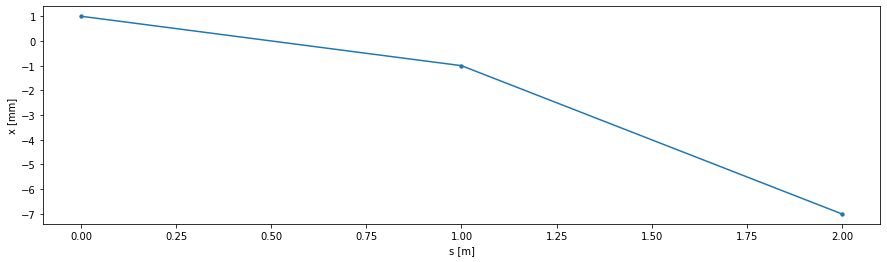

In [27]:
# Repeating exercise 5 with these functions is more compact

# beamline definition
f = 0.25*1000
L = 1*1000
beamline = Q(2*f)+D(L)+Q(-f)+D(L)+Q(2*f)

# inital coordinates of particle
X_0 = np.array([[1], 
                [0]])

# tracking
tracked_data = transportParticles(X_0, beamline)

# Plot particle coordinates at each element
plt.figure(figsize=(15,4))
plt.plot(tracked_data['s']*1e-3, tracked_data['x'], '.-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

### All these functions are available in the ``tracking_library.py`` file which we will import in the following notebooks